In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

IndexError: list index out of range

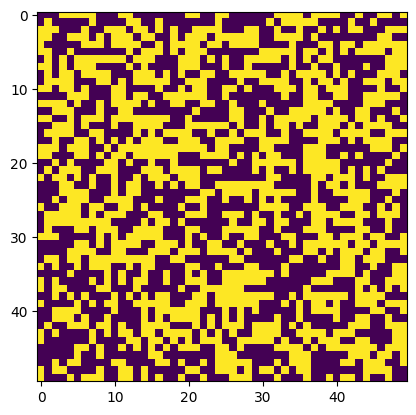

In [65]:
def energy(a,j):
    h = -j * (a * (np.roll(a,1,axis=0) + np.roll(a,1, axis = 1)))
    return np.sum(h)


def randominitial(n):
    b = np.random.choice(2,(n,n))
    b[b==0] = -1
    return b

def probabilities(j,T):

    probs = []
    dE = np.array([-8,-4.,0.,4.,8.])
    dE *= j
    
    if T == 0:
        probs = [1,1,1,0,0]
        return dict(zip(dE,probs))
    
    for de in dE:
        probs.append(min(1,np.exp(-de*(T)**(-1))))
    return dict(zip(dE, probs))

def convergence(steps:int, n,j,T,a_in, fname = 'animation.mp4'):

    probs = probabilities(j,T)
    
    numsteps = 1000
    skipsteps = steps//numsteps

    a = a_in.copy()

    energies = np.empty(steps)

    oldenergy = energy(a,j)

    data = []

    for i in range(steps):
        energies[i] = oldenergy

        if i % numsteps == 0:
            data.append(a)
        
        
        x = np.random.randint(0,n)
        y = np.random.randint(0,n)

        b = a.copy()
        b[x,y] *= -1

        dE = j*(a[x,y]-b[x,y])*(a[x,(y+1)%n] + a[(x+1)%n,y] + a[x,y-1] + a[x-1,y])

        '''if i % 100000 == 0:
            plt.imshow(a)
            plt.title(f"{i}th step")
            plt.show()
        '''
        
        if dE <= 0 or np.random.rand() <= probs[dE]:
            a[x,y] *= -1
            oldenergy += dE
        else:
            continue
        
    fig, ax = plt.subplots()
    im = ax.imshow(data[0])

    def update(frame):
        im.set_array(data[frame])
        return [im]

    ani = anim.FuncAnimation(fig, update, frames=steps//skipsteps, interval=10, blit=True)

    ani.save(fname, fps=60)

    plt.show()

    return np.arange(steps), energies, a


n = 50
a_in = randominitial(n)

for i in [60]:
    step, u, a = convergence(int(1e4), n, 5, i, a_in, fname = f'animation_T{i}.mp4')
    plt.plot(step, u)
    plt.title(str(i))
    plt.show()


#plt.imshow(a)
#plt.show()